## Dataset Acquisition and Understanding

In [2]:
# necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('UCI_Credit_Card.csv')

# Inspecting the first few rows of the dataframe
print("First 5 rows of the dataset:")
print(df.head())

# Getting the columns and their data types
print("\nColumn names and data types:")
print(df.dtypes)

# Getting summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(df.describe())

# Checking for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Checking the shape of the dataset
print("\nShape of the dataset (rows, columns):")
print(df.shape)

First 5 rows of the dataset:
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.mon

##Exploratory Data Analysis (EDA)

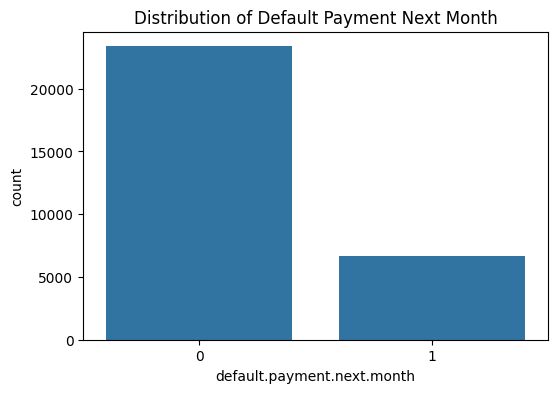

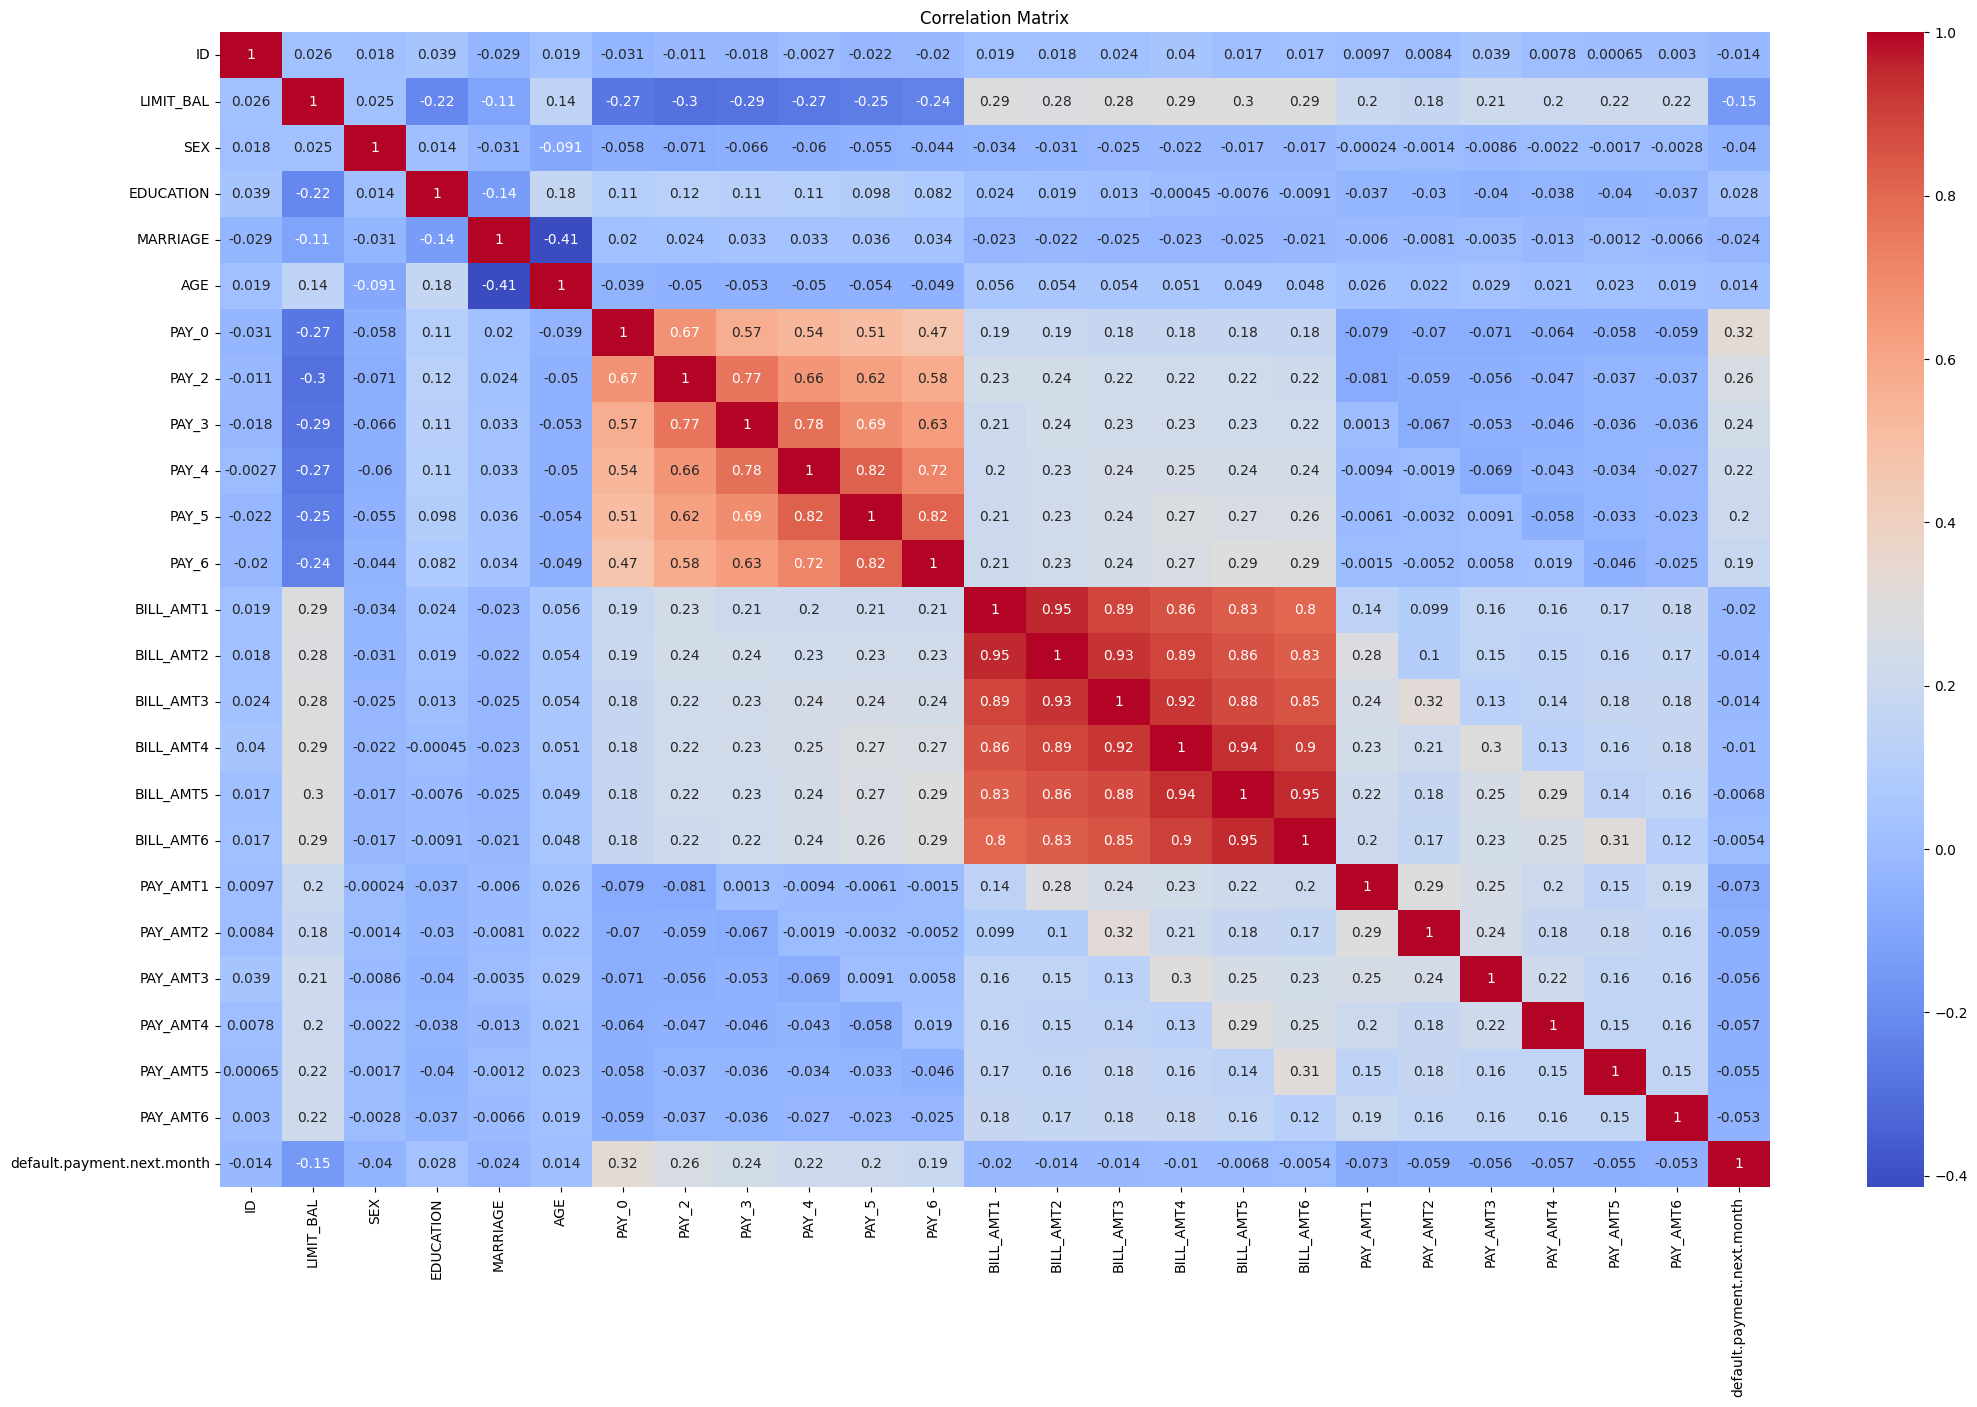

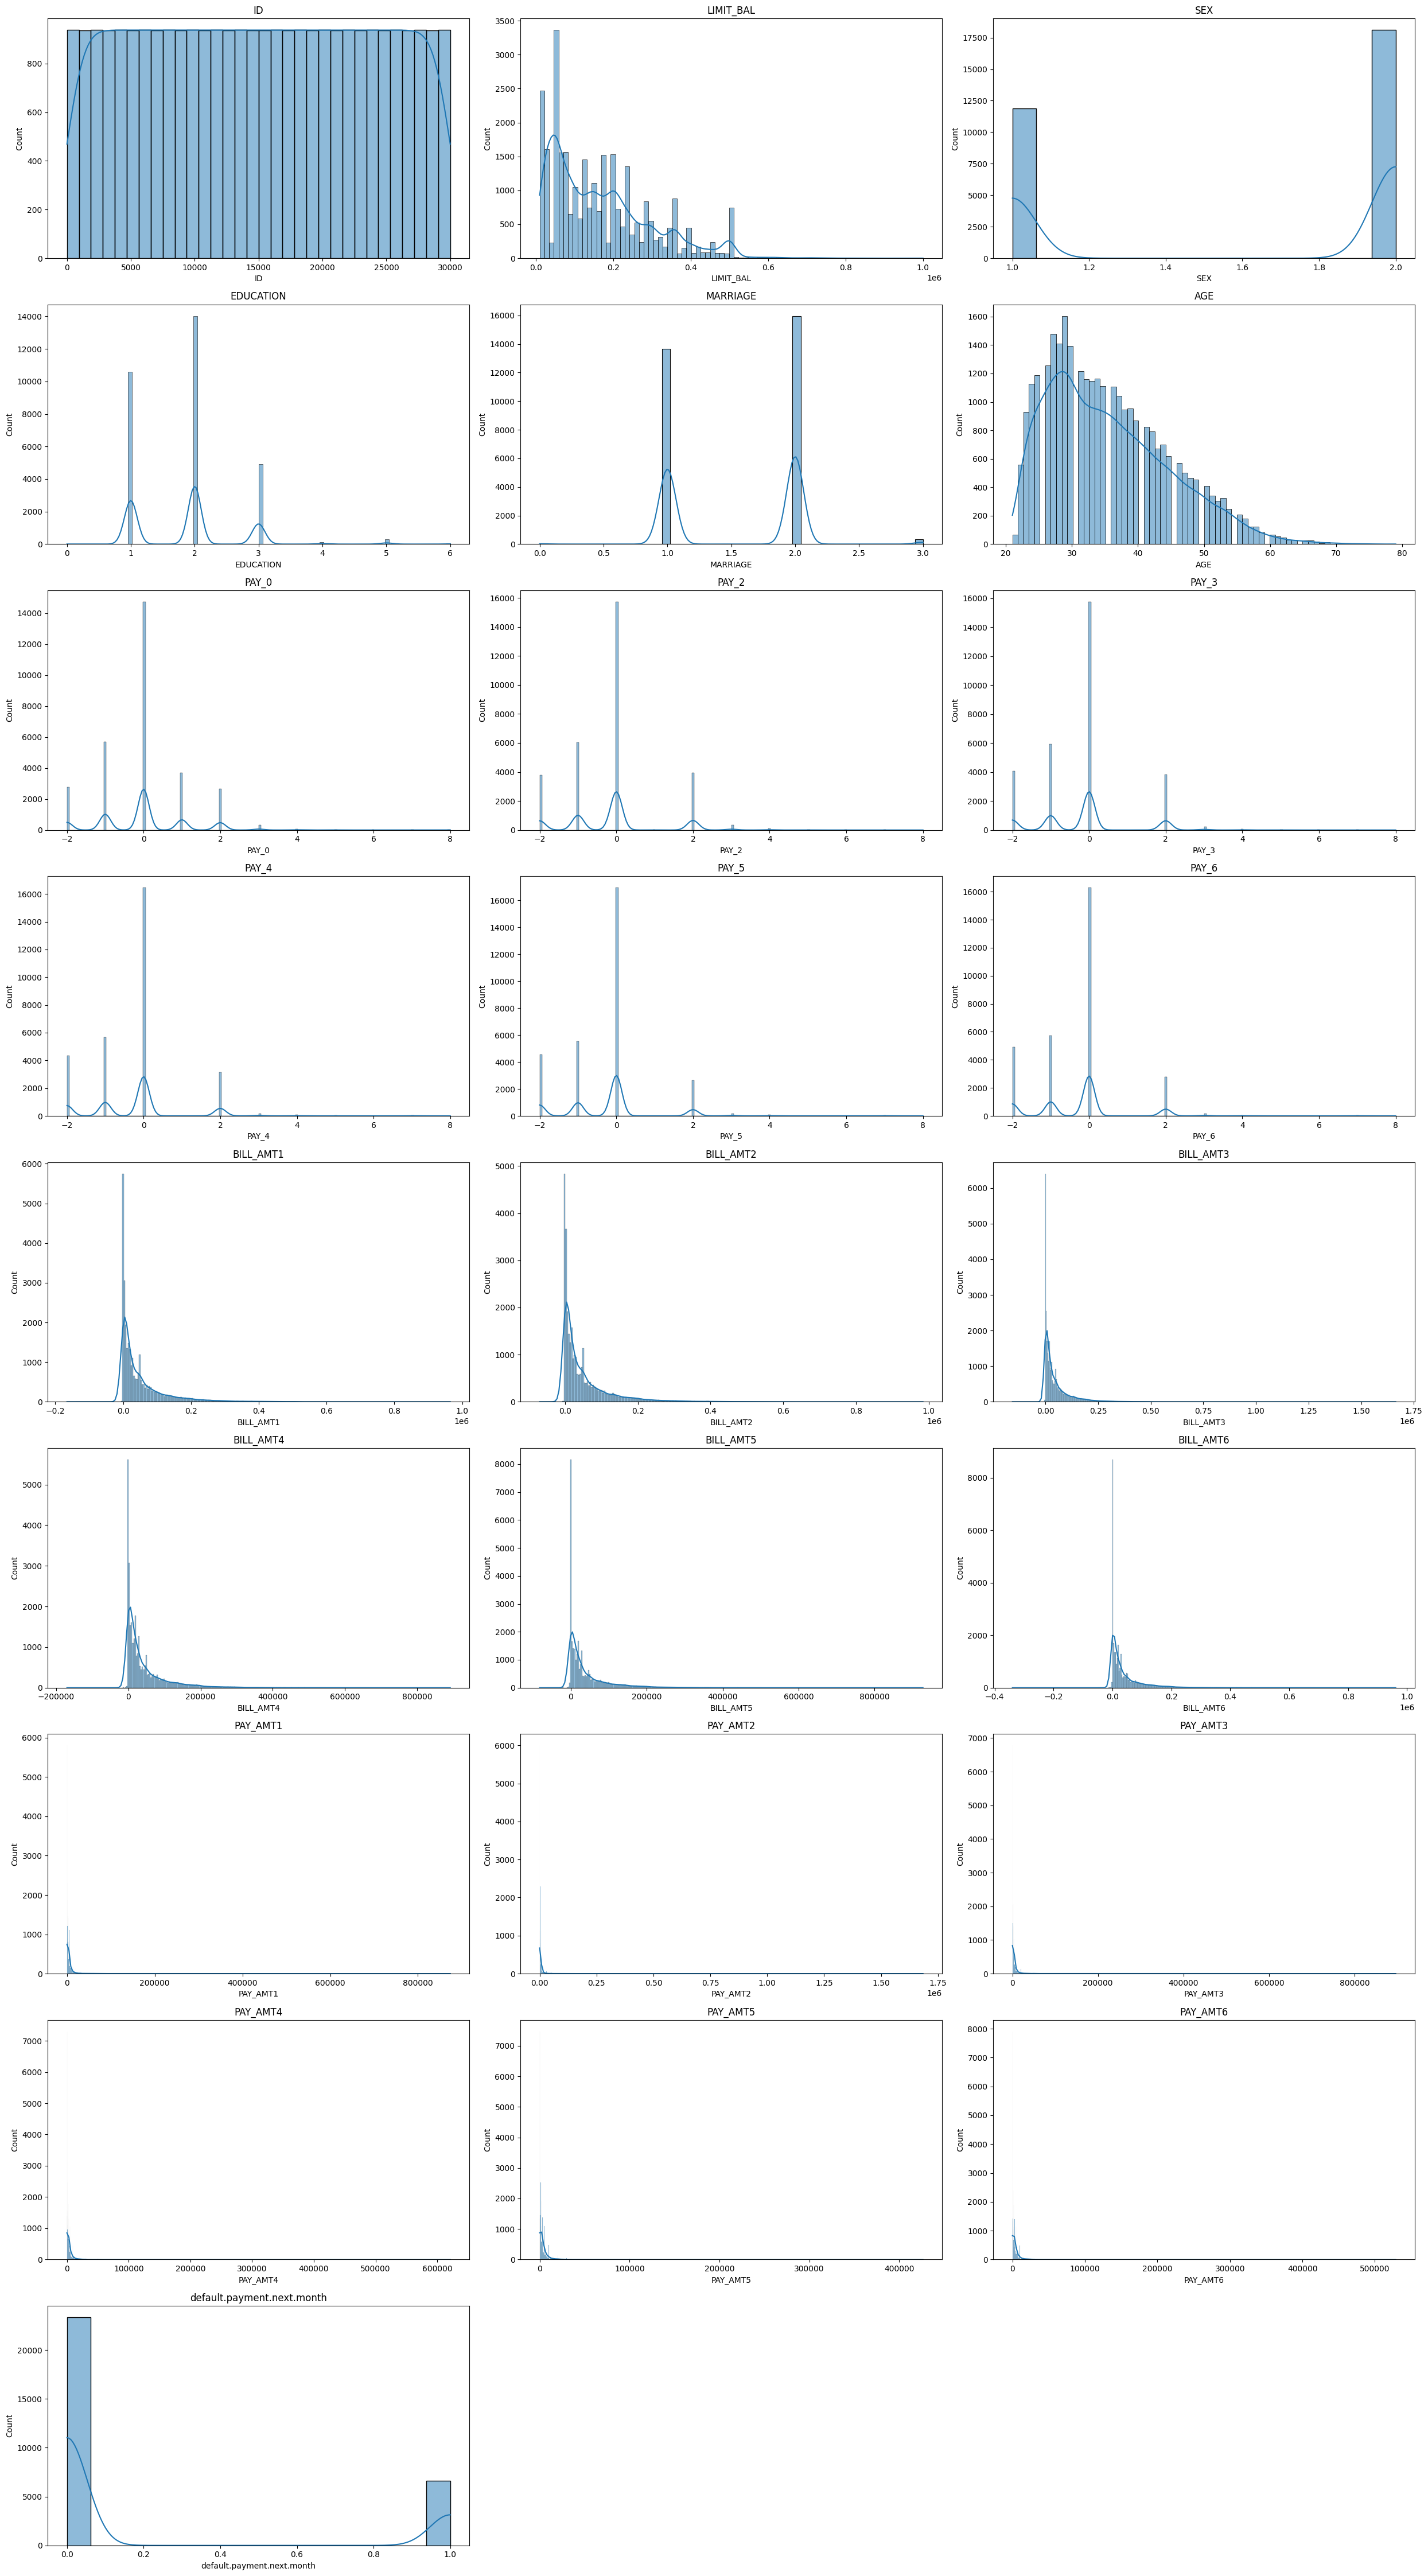

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target variable
plt.figure(figsize=(6,4))
sns.countplot(x='default.payment.next.month', data=df)
plt.title('Distribution of Default Payment Next Month')
plt.show()

# Correlation matrix
plt.figure(figsize=(25,15))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution of numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Determine the number of rows and columns for the subplots
num_plots = len(numerical_features)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

plt.figure(figsize=(25, num_rows * 5))
for i, column in enumerate(numerical_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

##Data Preprocessing
Step 1: Handling Missing Values (if any)

In [5]:
# Checking for missing values
print("Missing values in the dataset:")
print(df.isnull().sum())

# No missing values for this dataset

Missing values in the dataset:
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


Step 2: Encode Categorical Variables

The dataset doesn't have categorical variables that need encoding for this specific dataset.

Step 3: Feature Scaling

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Defining features and target variable
X = df.drop(columns=['ID', 'default.payment.next.month'])
y = df['default.payment.next.month']

# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##4. Model Building

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# XGBoost model
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

##5. Model Evaluation

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7009
           1       0.70      0.24      0.35      1991

    accuracy                           0.81      9000
   macro avg       0.76      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000

ROC-AUC Score: 0.6034784221965029


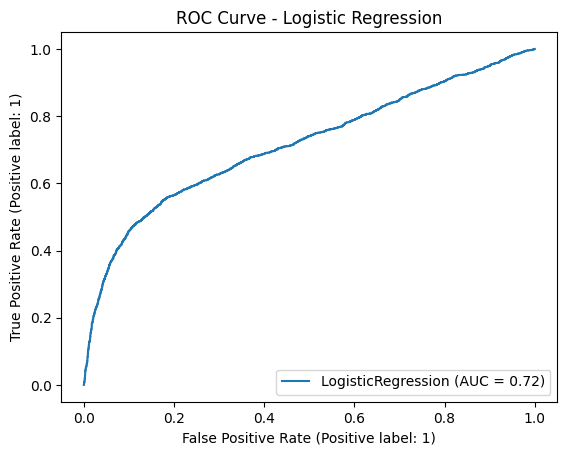

In [8]:
#Step 1: Evaluate Logistic Regression

from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay

print("Logistic Regression Performance:")
y_pred_logreg = logreg.predict(X_test_scaled)
print(classification_report(y_test, y_pred_logreg))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_logreg))
RocCurveDisplay.from_estimator(logreg, X_test_scaled, y_test)
plt.title('ROC Curve - Logistic Regression')
plt.show()

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7009
           1       0.63      0.36      0.46      1991

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000

ROC-AUC Score: 0.6518224863935075


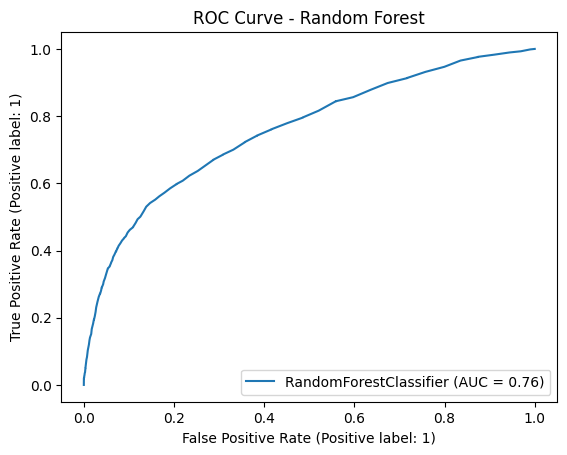

In [9]:
#Step 2: Evaluate Random Forest

print("Random Forest Performance:")
y_pred_rf = rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_rf))
RocCurveDisplay.from_estimator(rf, X_test_scaled, y_test)
plt.title('ROC Curve - Random Forest')
plt.show()

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.84      0.94      0.88      7009
           1       0.62      0.35      0.45      1991

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000

ROC-AUC Score: 0.6455842559888738


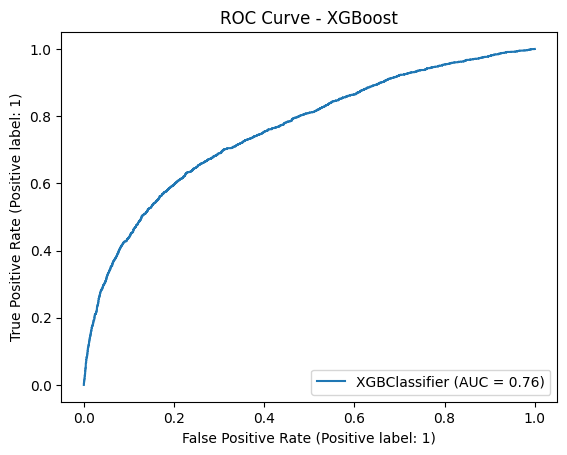

In [10]:
#Step 3: Evaluate XGBoost

print("XGBoost Performance:")
y_pred_xgb = xgb.predict(X_test_scaled)
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_xgb))
RocCurveDisplay.from_estimator(xgb, X_test_scaled, y_test)
plt.title('ROC Curve - XGBoost')
plt.show()

##6. Model Tuning

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best XGBoost Performance After Tuning:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.67      0.36      0.46      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000

ROC-AUC Score: 0.6529777779433904


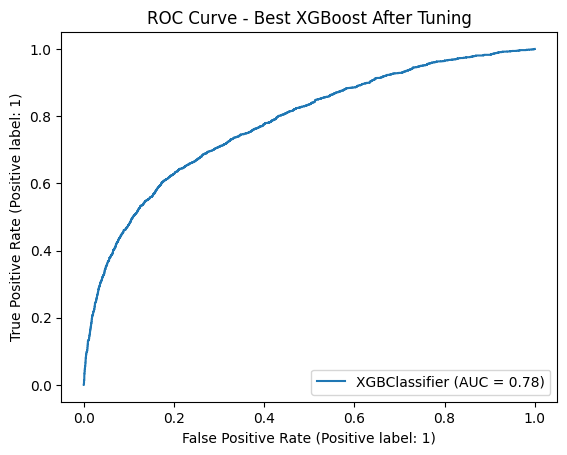

In [11]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter-tuning for XGBoost

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and model evaluation
best_xgb = grid_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test_scaled)
print("Best XGBoost Performance After Tuning:")
print(classification_report(y_test, y_pred_best_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_best_xgb))
RocCurveDisplay.from_estimator(best_xgb, X_test_scaled, y_test)
plt.title('ROC Curve - Best XGBoost After Tuning')
plt.show()